# Data Cleaning and Exploratory Data Analysis (EDA)


## 1. Setup

In [1]:
import os
import sys
import math
import json
from typing import List, Dict, Optional, Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ResidentMario/missingno-data/master/nyc_collision_factors.csv")

In [3]:
df

DATE      TIME    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0     11/10/2016  16:11:00   BROOKLYN   11208.0  40.662514 -73.872007   
1     11/10/2016  05:11:00  MANHATTAN   10013.0  40.721323 -74.008344   
2     04/16/2016  09:15:00   BROOKLYN   11201.0  40.687999 -73.997563   
3     04/15/2016  10:20:00     QUEENS   11375.0  40.719228 -73.854542   
4     04/15/2016  10:35:00   BROOKLYN   11210.0  40.632147 -73.952731   
...          ...       ...        ...       ...        ...        ...   
7298  01/07/2016  21:30:00   BROOKLYN   11235.0  40.584305 -73.959113   
7299  01/06/2016  12:50:00   BROOKLYN   11220.0  40.638583 -74.020772   
7300  01/04/2016  17:45:00   BROOKLYN   11235.0  40.581744 -73.953836   
7301  01/02/2016  17:20:00  MANHATTAN   10016.0  40.750960 -73.982723   
7302  01/02/2016  20:00:00   BROOKLYN   11213.0  40.663604 -73.934391   

                       LOCATION      ON STREET NAME CROSS STREET NAME  \
0     (40.6625139, -73.8720068)      WORTMAN AVENUE    MONTAUK AVENUE   
1     (40.7213228, -74.0083444)       HUBERT STREET     HUDSON STREET   
2     (40.6879989, -73.9975625)        HENRY STREET     WARREN STREET   
3     (40.7192276, -73.8545422)                 NaN               NaN   
4     (40.6321467, -73.9527315)      BEDFORD AVENUE       CAMPUS ROAD   
...                         ...                 ...               ...   
7298  (40.5843046, -73.9591125)      EAST 11 STREET       BLAKE COURT   
7299  (40.6385828, -74.0207721)            4 AVENUE         64 STREET   
7300  (40.5817444, -73.9538363)     SHORE BOULEVARD        CASS PLACE   
7301  (40.7509597, -73.9827227)      WEST 38 STREET          5 AVENUE   
7302  (40.6636039, -73.9343912)  SCHENECTADY AVENUE  EMPIRE BOULEVARD   

         OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 1  \
0                    NaN  ...  Failure to Yield Right-of-Way   
1                    NaN  ...  Failure to Yield Right-of-Way   
2                    NaN  ...             Lost Consciousness   
3     67-64 FLEET STREET  ...  Failure to Yield Right-of-Way   
4                    NaN  ...  Failure to Yield Right-of-Way   
...                  ...  ...                            ...   
7298                 NaN  ...             Lost Consciousness   
7299                 NaN  ...  Failure to Yield Right-of-Way   
7300                 NaN  ...  Failure to Yield Right-of-Way   
7301                 NaN  ...             Lost Consciousness   
7302                 NaN  ...             Lost Consciousness   

      CONTRIBUTING FACTOR VEHICLE 2  CONTRIBUTING FACTOR VEHICLE 3  \
0                       Unspecified                            NaN   
1                               NaN                            NaN   
2                Lost Consciousness                            NaN   
3     Failure to Yield Right-of-Way  Failure to Yield Right-of-Way   
4     Failure to Yield Right-of-Way                            NaN   
...                             ...                            ...   
7298                    Unspecified                            NaN   
7299                    Unspecified                            NaN   
7300                    Unspecified                            NaN   
7301             Lost Consciousness                            NaN   
7302                    Unspecified                            NaN   

      CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  \
0                               NaN                            NaN   
1                               NaN                            NaN   
2                               NaN                            NaN   
3                               NaN                            NaN   
4                               NaN                            NaN   
...                             ...                            ...   
7298                            NaN                            NaN   
7299                            NaN                            NaN   
7300              


## 2. Initial profiling

Start with shape, memory footprint, head and tail, and basic numerical summaries. Keep an eye on obvious anomalies like negative ages or impossible dates.


In [4]:
print('Rows:', len(df), 'Columns:', df.shape[1])
mem = df.memory_usage(deep=True).sum() / (1024**2)
print(f'Memory MB: {mem:.2f}')
display(df.head(3))
display(df.tail(3))
display(df.describe(include='all').T)


Rows: 7303 Columns: 26
Memory MB: 6.45


DATE      TIME    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0  11/10/2016  16:11:00   BROOKLYN   11208.0  40.662514 -73.872007   
1  11/10/2016  05:11:00  MANHATTAN   10013.0  40.721323 -74.008344   
2  04/16/2016  09:15:00   BROOKLYN   11201.0  40.687999 -73.997563   

                    LOCATION  ON STREET NAME CROSS STREET NAME  \
0  (40.6625139, -73.8720068)  WORTMAN AVENUE    MONTAUK AVENUE   
1  (40.7213228, -74.0083444)   HUBERT STREET     HUDSON STREET   
2  (40.6879989, -73.9975625)    HENRY STREET     WARREN STREET   

  OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 1  \
0             NaN  ...  Failure to Yield Right-of-Way   
1             NaN  ...  Failure to Yield Right-of-Way   
2             NaN  ...             Lost Consciousness   

   CONTRIBUTING FACTOR VEHICLE 2  CONTRIBUTING FACTOR VEHICLE 3  \
0                    Unspecified                            NaN   
1                            NaN                            NaN   
2             Lost Consciousness                            NaN   

   CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   

   VEHICLE TYPE CODE 1 VEHICLE TYPE CODE 2 VEHICLE TYPE CODE 3  \
0                 TAXI   PASSENGER VEHICLE                 NaN   
1    PASSENGER VEHICLE                 NaN                 NaN   
2    PASSENGER VEHICLE                 VAN                 NaN   

  VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  

[3 rows x 26 columns]

DATE      TIME    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
7300  01/04/2016  17:45:00   BROOKLYN   11235.0  40.581744 -73.953836   
7301  01/02/2016  17:20:00  MANHATTAN   10016.0  40.750960 -73.982723   
7302  01/02/2016  20:00:00   BROOKLYN   11213.0  40.663604 -73.934391   

                       LOCATION      ON STREET NAME CROSS STREET NAME  \
7300  (40.5817444, -73.9538363)     SHORE BOULEVARD        CASS PLACE   
7301  (40.7509597, -73.9827227)      WEST 38 STREET          5 AVENUE   
7302  (40.6636039, -73.9343912)  SCHENECTADY AVENUE  EMPIRE BOULEVARD   

     OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 1  \
7300             NaN  ...  Failure to Yield Right-of-Way   
7301             NaN  ...             Lost Consciousness   
7302             NaN  ...             Lost Consciousness   

      CONTRIBUTING FACTOR VEHICLE 2  CONTRIBUTING FACTOR VEHICLE 3  \
7300                    Unspecified                            NaN   
7301             Lost Consciousness                            NaN   
7302                    Unspecified                            NaN   

      CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  \
7300                            NaN                            NaN   
7301                            NaN                            NaN   
7302                            NaN                            NaN   

                VEHICLE TYPE CODE 1 VEHICLE TYPE CODE 2 VEHICLE TYPE CODE 3  \
7300              PASSENGER VEHICLE   PASSENGER VEHICLE                 NaN   
7301              PASSENGER VEHICLE                TAXI                 NaN   
7302  SPORT UTILITY / STATION WAGON   PASSENGER VEHICLE                 NaN   

     VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  
7300                 NaN                 NaN  
7301                 NaN                 NaN  
7302                 NaN                 NaN  

[3 rows x 26 columns]

count unique                            top  \
DATE                             7303    215                     04/11/2016   
TIME                             7303    931                       15:00:00   
BOROUGH                          6920      5                       BROOKLYN   
ZIP CODE                       6919.0    NaN                            NaN   
LATITUDE                       7303.0    NaN                            NaN   
LONGITUDE                      7303.0    NaN                            NaN   
LOCATION                         7303   5738      (40.6960346, -73.9845292)   
ON STREET NAME                   6238   1671                       BROADWAY   
CROSS STREET NAME                6166   1935                       BROADWAY   
OFF STREET NAME                   761    757     90-15     QUEENS BOULEVARD   
NUMBER OF PERSONS INJURED      7303.0    NaN                            NaN   
NUMBER OF PERSONS KILLED       7303.0    NaN                            NaN   
NUMBER OF PEDESTRIANS INJURED  7303.0    NaN                            NaN   
NUMBER OF PEDESTRIANS KILLED   7303.0    NaN                            NaN   
NUMBER OF CYCLISTS INJURED        0.0    NaN                            NaN   
NUMBER OF CYCLISTS KILLED         0.0    NaN                            NaN   
CONTRIBUTING FACTOR VEHICLE 1    7303      2  Failure to Yield Right-of-Way   
CONTRIBUTING FACTOR VEHICLE 2    6218     31                    Unspecified   
CONTRIBUTING FACTOR VEHICLE 3     303      6                    Unspecified   
CONTRIBUTING FACTOR VEHICLE 4      59      4                    Unspecified   
CONTRIBUTING FACTOR VEHICLE 5      14      2                    Unspecified   
VEHICLE TYPE CODE 1              7245     15              PASSENGER VEHICLE   
VEHICLE TYPE CODE 2              5783     16              PASSENGER VEHICLE   
VEHICLE TYPE CODE 3               284     12              PASSENGER VEHICLE   
VEHICLE TYPE CODE 4                54      4              PASSENGER VEHICLE   
VEHICLE TYPE CODE 5                12      4              PASSENGER VEHICLE   

                               freq         mean         std        min  \
DATE                             80          NaN         NaN        NaN   
TIME                             95          NaN         NaN        NaN   
BOROUGH                        2329          NaN         NaN        NaN   
ZIP CODE                        NaN  10900.74664  551.568724    10001.0   
LATITUDE                        NaN    40.717653    0.069437  40.502341   
LONGITUDE                       NaN   -73.921406    0.083317 -74.248277   
LOCATION                          9          NaN         NaN        NaN   
ON STREET NAME                   88          NaN         NaN        NaN   
CROSS STREET NAME                74          NaN         NaN        NaN   
OFF STREET NAME                   2          NaN         NaN        NaN   
NUMBER OF PERSONS INJURED       NaN     0.350678    0.707873        0.0   
NUMBER OF PERSONS KILLED        NaN     0.000959    0.030947        0.0   
NUMBER OF PEDESTRIANS INJURED   NaN     0.133644    0.362129        0.0   
NUMBER OF PEDESTRIANS KILLED    NaN     0.000822    0.028653        0.0   
NUMBER OF CYCLISTS INJURED      NaN          NaN         NaN        NaN   
NUMBER OF CYCLISTS KILLED       NaN          NaN         NaN        NaN   
CONTRIBUTING FACTOR VEHICLE 1  5303          NaN         NaN        NaN   
CONTRIBUTING FACTOR VEHICLE 2  3220          NaN         NaN        NaN   
CONTRIBUTING FACTOR VEHICLE 3   191          NaN         NaN        NaN   
CONTRIBUTING FACTOR VEHICLE 4    39          NaN         NaN        NaN   
CONTRIBUTING FACTOR VEHICLE 5    13          NaN         NaN        NaN   
VEHICLE TYPE CODE 1            4710          NaN         NaN        NaN   
VEHICLE TYPE CODE 2            3516          NaN         NaN        NaN   
VEHICLE TYPE CODE 3             194          NaN         NaN        NaN   
VEHICLE TYPE CODE 4    

## 3. Data types and schema

Lock down expected schema early. If you know the intended types, define them. Otherwise infer and then enforce after review.


In [5]:
# Combining DATE and TIME into a single DATETIME
df["DATETIME"] = pd.to_datetime(
    df["DATE"] + " " + df["TIME"],
    format="%m/%d/%Y %H:%M:%S",
    errors="coerce"
)
df = df.drop(columns=["DATE", "TIME"])

# LOCATION is redundant since it is just a concatenation of LATITUDE and LONGITUDE
df = df.drop(columns=["LOCATION"])

# Standardizing null values to use pandas null type
df = df.replace({np.nan: pd.NA})

In [6]:
import pandas as pd
import pandera.pandas as pa

schema = pa.DataFrameSchema(
    {
        "DATETIME": pa.Column(pa.DateTime, nullable=False),
        "BOROUGH": pa.Column(pa.String, nullable=True),
        "ZIP CODE": pa.Column(pd.Int64Dtype(), nullable=True),
        "LATITUDE": pa.Column(pa.Float, nullable=False),
        "LONGITUDE": pa.Column(pa.Float, nullable=False),
        "ON STREET NAME": pa.Column(pa.String, nullable=True),
        "CROSS STREET NAME": pa.Column(pa.String, nullable=True),
        "OFF STREET NAME": pa.Column(pa.String, nullable=True),

        "NUMBER OF PERSONS INJURED": pa.Column(pd.Int64Dtype(), nullable=True, checks=pa.Check.ge(0)),
        "NUMBER OF PERSONS KILLED": pa.Column(pd.Int64Dtype(), nullable=True, checks=pa.Check.ge(0)),
        "NUMBER OF PEDESTRIANS INJURED": pa.Column(pd.Int64Dtype(), nullable=True, checks=pa.Check.ge(0)),
        "NUMBER OF PEDESTRIANS KILLED": pa.Column(pd.Int64Dtype(), nullable=True, checks=pa.Check.ge(0)),
        "NUMBER OF CYCLISTS INJURED": pa.Column(pd.Int64Dtype(), nullable=True, checks=pa.Check.ge(0)),
        "NUMBER OF CYCLISTS KILLED": pa.Column(pd.Int64Dtype(), nullable=True, checks=pa.Check.ge(0)),

        "CONTRIBUTING FACTOR VEHICLE 1": pa.Column(pa.String, nullable=True),
        "CONTRIBUTING FACTOR VEHICLE 2": pa.Column(pa.String, nullable=True),
        "CONTRIBUTING FACTOR VEHICLE 3": pa.Column(pa.String, nullable=True),
        "CONTRIBUTING FACTOR VEHICLE 4": pa.Column(pa.String, nullable=True),
        "CONTRIBUTING FACTOR VEHICLE 5": pa.Column(pa.String, nullable=True),

        "VEHICLE TYPE CODE 1": pa.Column(pa.String, nullable=True),
        "VEHICLE TYPE CODE 2": pa.Column(pa.String, nullable=True),
        "VEHICLE TYPE CODE 3": pa.Column(pa.String, nullable=True),
        "VEHICLE TYPE CODE 4": pa.Column(pa.String, nullable=True),
        "VEHICLE TYPE CODE 5": pa.Column(pa.String, nullable=True),
    },
    strict=True,
    coerce=True,
)


In [7]:
df = schema.validate(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   BOROUGH                        6920 non-null   object        
 1   ZIP CODE                       6919 non-null   Int64         
 2   LATITUDE                       7303 non-null   float64       
 3   LONGITUDE                      7303 non-null   float64       
 4   ON STREET NAME                 6238 non-null   object        
 5   CROSS STREET NAME              6166 non-null   object        
 6   OFF STREET NAME                761 non-null    object        
 7   NUMBER OF PERSONS INJURED      7303 non-null   Int64         
 8   NUMBER OF PERSONS KILLED       7303 non-null   Int64         
 9   NUMBER OF PEDESTRIANS INJURED  7303 non-null   Int64         
 10  NUMBER OF PEDESTRIANS KILLED   7303 non-null   Int64         
 11  NUMBER OF CYCLIST

## 4. Missingness analysis

Not all missingness is equal. Look for systematic patterns. If missing correlates with the target or key features, imputing without care can bias downstream analyses.

NOTE:  The dataset and example come straight from the `missingno` docs.

In [9]:
import missingno as msno

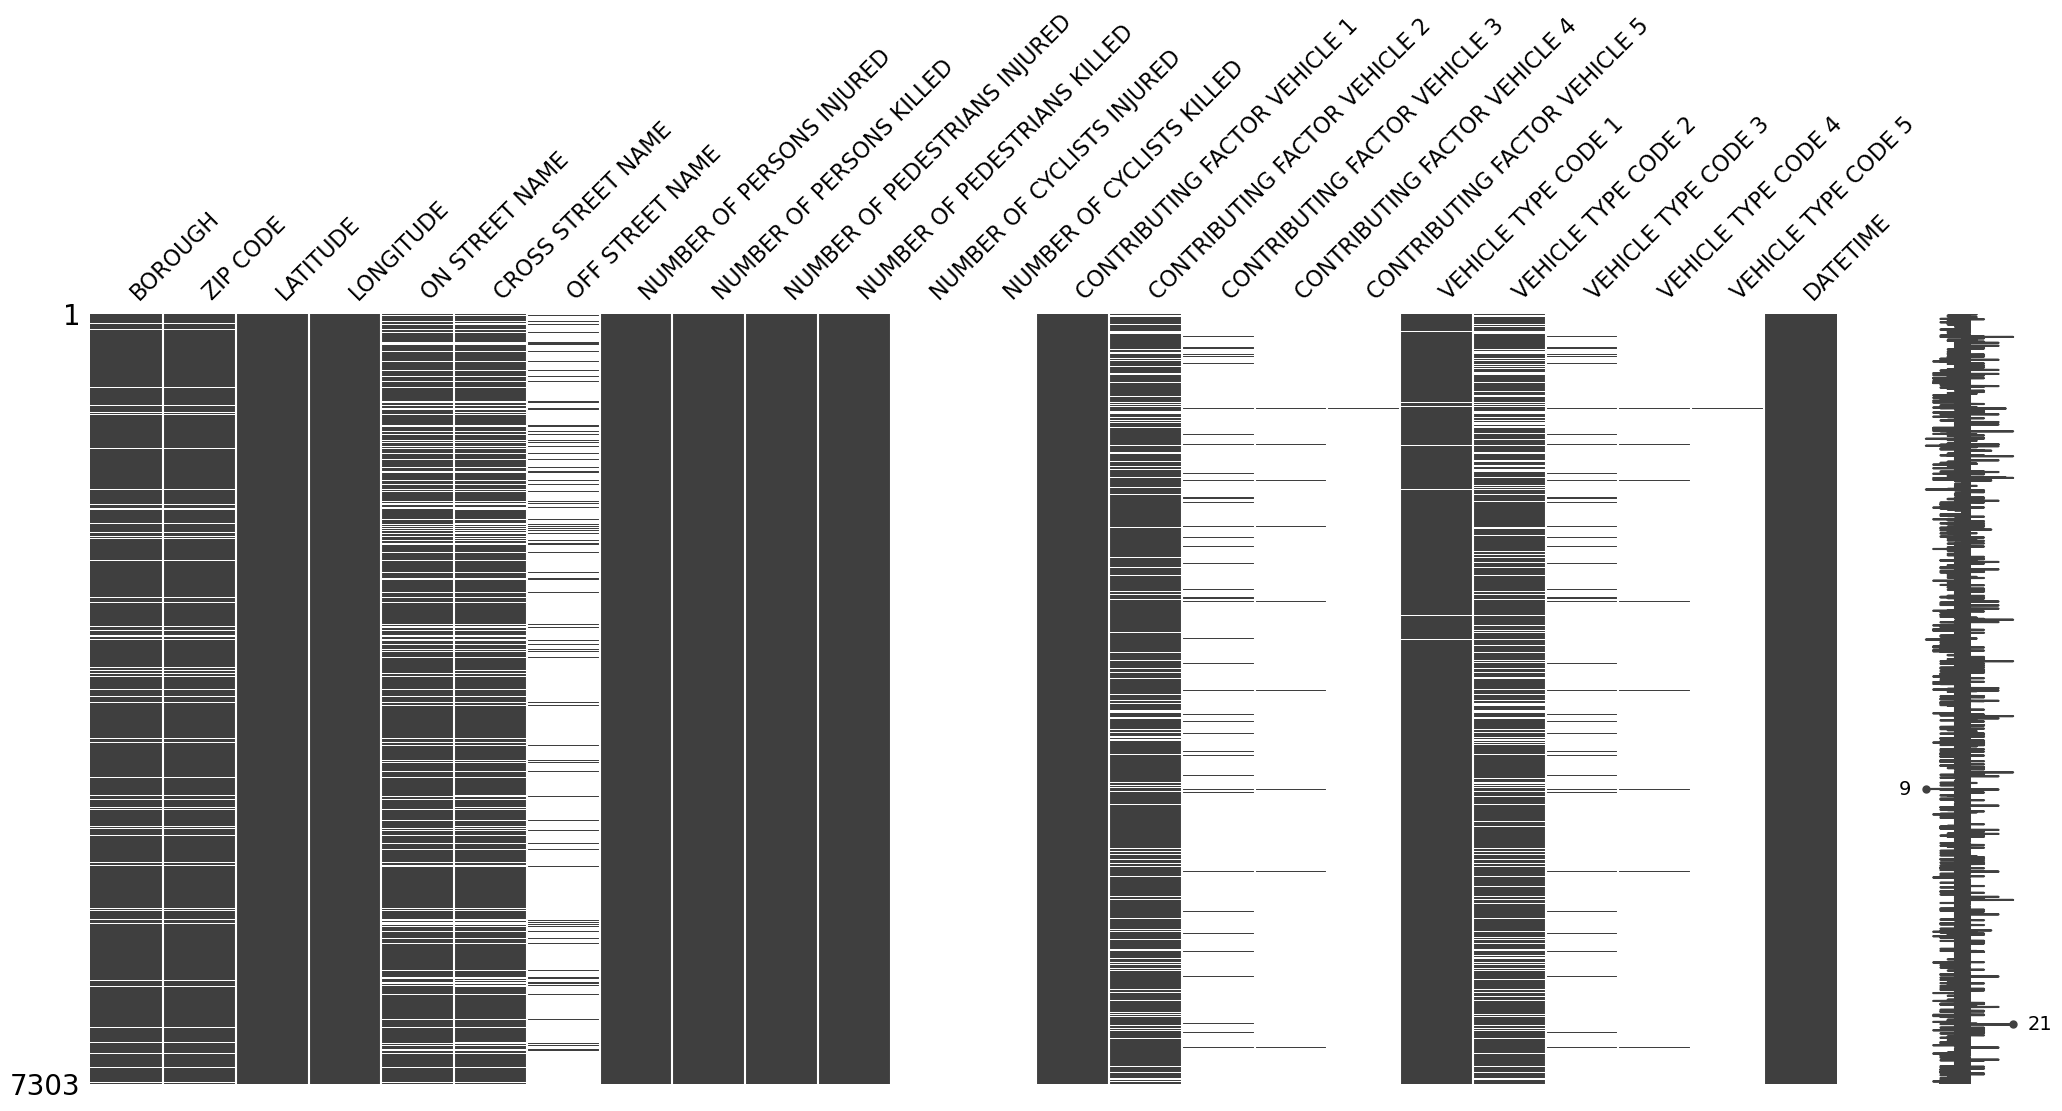

In [10]:
msno.matrix(df)
plt.show()

At a glance, date, time, the distribution of injuries, and the contribution factor of the first vehicle appear to be completely populated, while geographic information seems mostly complete, but spottier.

The sparkline at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

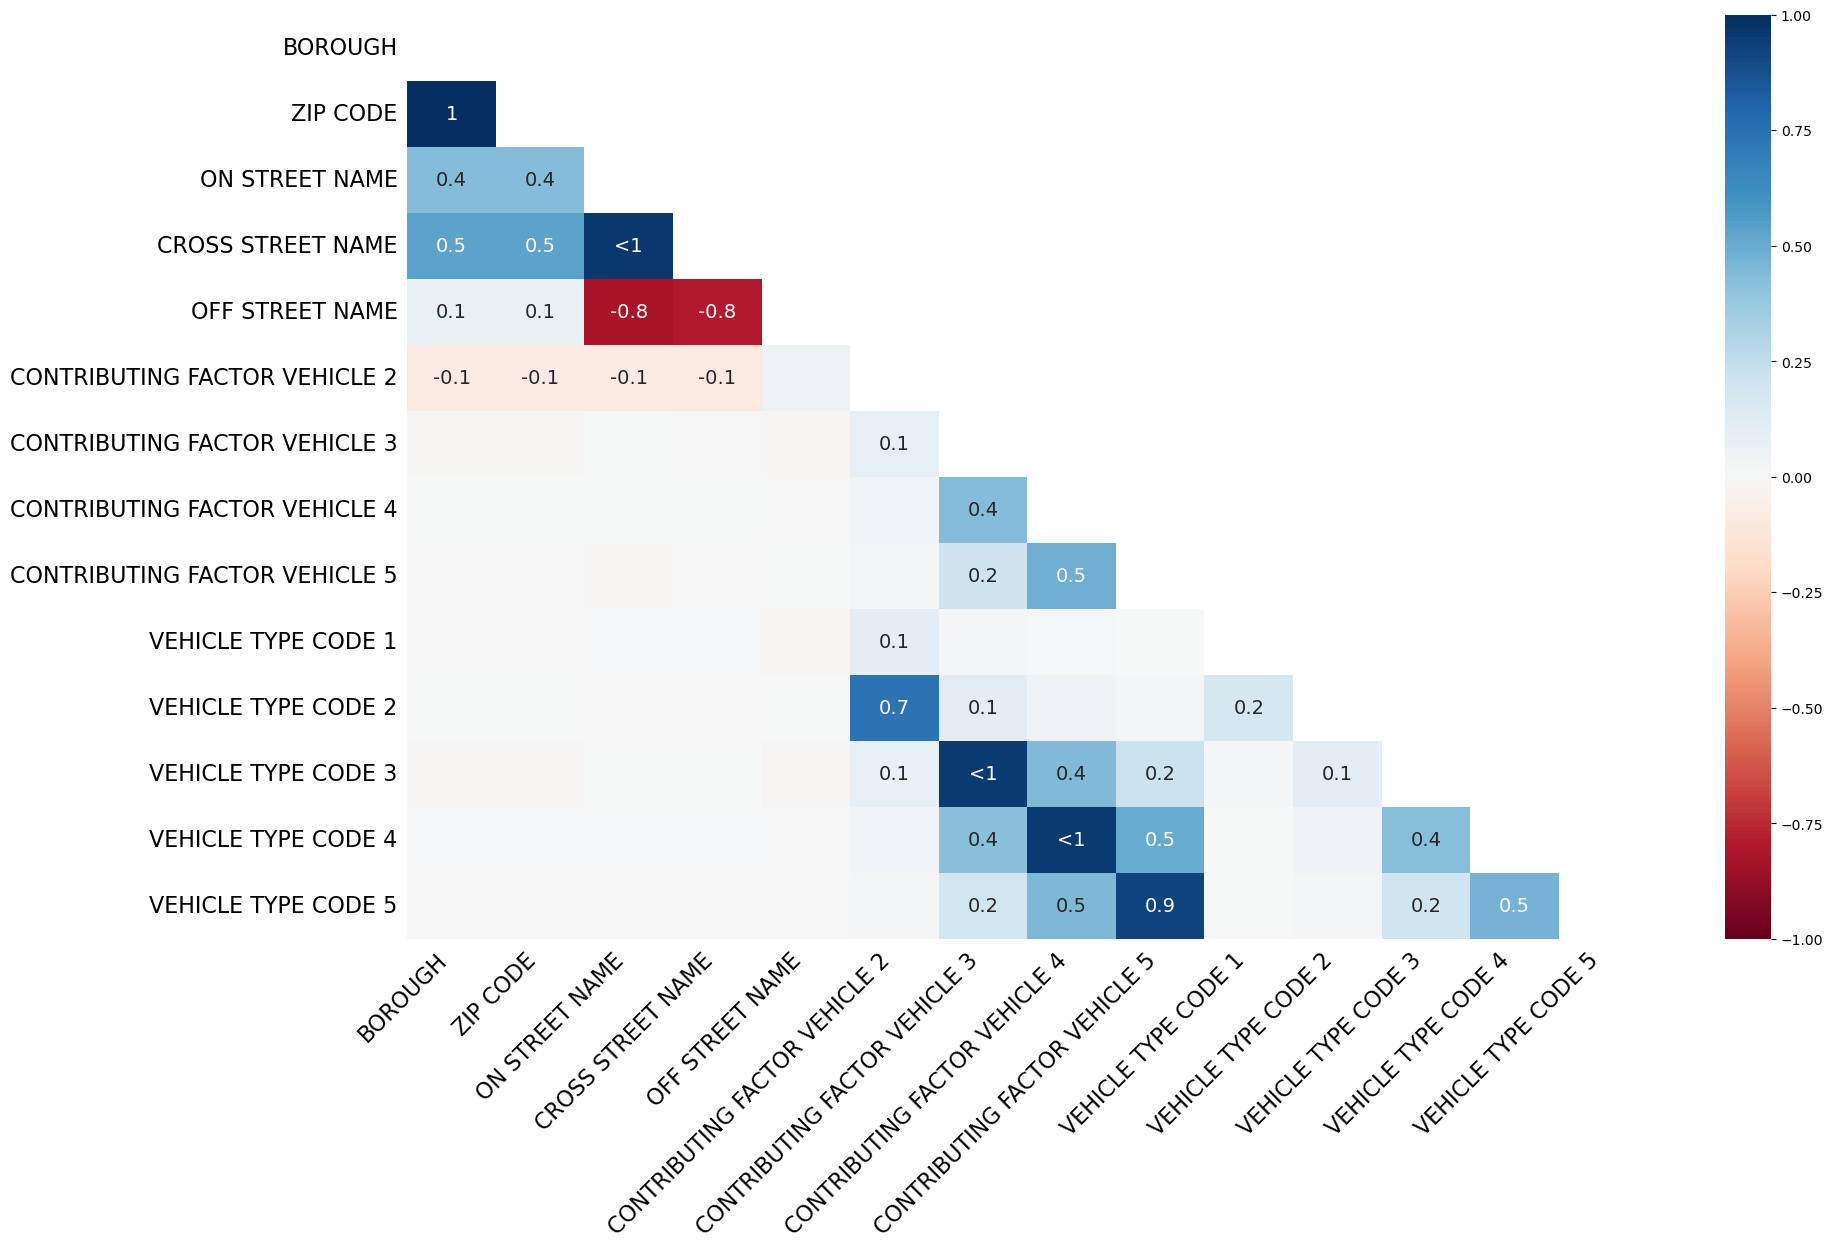

In [11]:
msno.heatmap(df)
plt.show()

In this example, it seems that reports which are filed with an OFF STREET NAME variable are less likely to have complete geographic data.

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

## 5. Duplicates

Check for full row duplicates.


In [12]:
dup_rows = df.duplicated(keep = False)
print('Duplicate rows:', dup_rows.sum())
display(df[dup_rows].sort_values(by = "ZIP CODE"))

Duplicate rows: 14


BOROUGH  ZIP CODE   LATITUDE  LONGITUDE       ON STREET NAME  \
3323  MANHATTAN     10001  40.752723 -73.996788       WEST 33 STREET   
3324  MANHATTAN     10001  40.752723 -73.996788       WEST 33 STREET   
1351  MANHATTAN     10014  40.729112 -74.010672          WEST STREET   
5042  MANHATTAN     10014  40.729112 -74.010672          WEST STREET   
1695     QUEENS     11103  40.760946 -73.916293            41 STREET   
1696     QUEENS     11103  40.760946 -73.916293            41 STREET   
5636   BROOKLYN     11206  40.703375 -73.937631      BUSHWICK AVENUE   
5637   BROOKLYN     11206  40.703375 -73.937631      BUSHWICK AVENUE   
6317     QUEENS     11379  40.721019 -73.867573                 <NA>   
6495     QUEENS     11379  40.721019 -73.867573                 <NA>   
1818     QUEENS     11411  40.698018 -73.744018  NASHVILLE BOULEVARD   
1819     QUEENS     11411  40.698018 -73.744018  NASHVILLE BOULEVARD   
4027       <NA>      <NA>  40.703166 -73.816612                 <NA>   
4028       <NA>      <NA>  40.703166 -73.816612                 <NA>   

        CROSS STREET NAME OFF STREET NAME  NUMBER OF PERSONS INJURED  \
3323             9 AVENUE            <NA>                          1   
3324             9 AVENUE            <NA>                          1   
1351  WEST HOUSTON STREET            <NA>                          0   
5042  WEST HOUSTON STREET            <NA>                          0   
1695            31 AVENUE            <NA>                          0   
1696            31 AVENUE            <NA>                          0   
5636         VARET STREET            <NA>                          0   
5637         VARET STREET            <NA>                          0   
6317                 <NA>   84-48 64 ROAD                          0   
6495                 <NA>   84-48 64 ROAD                          0   
1818           116 AVENUE            <NA>                          0   
1819           116 AVENUE            <NA>                          0   
4027                 <NA>            <NA>                          0   
4028                 <NA>            <NA>                          0   

      NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS INJURED  ...  \
3323                         0                              0  ...   
3324                         0                              0  ...   
1351                         0                              0  ...   
5042                         0                              0  ...   
1695                         0                              0  ...   
1696                         0                              0  ...   
5636                         0                              0  ...   
5637                         0                              0  ...   
6317                         0                              0  ...   
6495                         0                              0  ...   
1818                         0                              0  ...   
1819                         0                              0  ...   
4027                         0                              0  ...   
4028                         0                              0  ...   

      CONTRIBUTING FACTOR VEHICLE 2  CONTRIBUTING FACTOR VEHICLE 3  \
3323  Failure to Yield Right-of-Way                           <NA>   
3324  Failure to Yield Right-of-Way                           <NA>   
1351  Failure to Yield Right-of-Way                           <NA>   
5042  Failure to Yield Right-of-Way                           <NA>   
1695  Failure to Yield Right-of-Way                           <NA>   
1696  Failure to Yield Right-of-Way                           <NA>   
5636                    Unspecified                           <NA>   
5637                    Unspecified                           <NA>   
6317  Failure to Yield Right-of-Way                           <NA>   
6495  Failure to Yield Right-of-Way                           <NA>   
1818  Failure to Yield Ri

## 6. Text cleanup

Trim whitespace and standardize case where appropriate.


In [13]:
string_cols = [
    "BOROUGH",
    "ON STREET NAME", "CROSS STREET NAME", "OFF STREET NAME",
    "CONTRIBUTING FACTOR VEHICLE 1", "CONTRIBUTING FACTOR VEHICLE 2",
    "CONTRIBUTING FACTOR VEHICLE 3", "CONTRIBUTING FACTOR VEHICLE 4",
    "CONTRIBUTING FACTOR VEHICLE 5",
    "VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2",
    "VEHICLE TYPE CODE 3", "VEHICLE TYPE CODE 4", "VEHICLE TYPE CODE 5",
]

df[string_cols] = df[string_cols].apply(lambda col: col.astype("string").str.strip().str.lower())


In [14]:
df

BOROUGH  ZIP CODE   LATITUDE  LONGITUDE      ON STREET NAME  \
0      brooklyn     11208  40.662514 -73.872007      wortman avenue   
1     manhattan     10013  40.721323 -74.008344       hubert street   
2      brooklyn     11201  40.687999 -73.997563        henry street   
3        queens     11375  40.719228 -73.854542                <NA>   
4      brooklyn     11210  40.632147 -73.952731      bedford avenue   
...         ...       ...        ...        ...                 ...   
7298   brooklyn     11235  40.584305 -73.959113      east 11 street   
7299   brooklyn     11220  40.638583 -74.020772            4 avenue   
7300   brooklyn     11235  40.581744 -73.953836     shore boulevard   
7301  manhattan     10016  40.750960 -73.982723      west 38 street   
7302   brooklyn     11213  40.663604 -73.934391  schenectady avenue   

     CROSS STREET NAME     OFF STREET NAME  NUMBER OF PERSONS INJURED  \
0       montauk avenue                <NA>                          0   
1        hudson street                <NA>                          1   
2        warren street                <NA>                          0   
3                 <NA>  67-64 fleet street                          0   
4          campus road                <NA>                          0   
...                ...                 ...                        ...   
7298       blake court                <NA>                          0   
7299         64 street                <NA>                          0   
7300        cass place                <NA>                          0   
7301          5 avenue                <NA>                          0   
7302  empire boulevard                <NA>                          0   

      NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS INJURED  ...  \
0                            0                              0  ...   
1                            0                              1  ...   
2                            0                              0  ...   
3                            0                              0  ...   
4                            0                              0  ...   
...                        ...                            ...  ...   
7298                         0                              0  ...   
7299                         0                              0  ...   
7300                         0                              0  ...   
7301                         0                              0  ...   
7302                         0                              0  ...   

      CONTRIBUTING FACTOR VEHICLE 2  CONTRIBUTING FACTOR VEHICLE 3  \
0                       unspecified                           <NA>   
1                              <NA>                           <NA>   
2                lost consciousness                           <NA>   
3     failure to yield right-of-way  failure to yield right-of-way   
4     failure to yield right-of-way                           <NA>   
...                             ...                            ...   
7298                    unspecified                           <NA>   
7299                    unspecified                           <NA>   
7300                    unspecified                           <NA>   
7301             lost consciousness                           <NA>   
7302                    unspecified                           <NA>   

      CONTRIBUTING FACTOR VEHICLE 4 CONTRIBUTING FACTOR VEHICLE 5  \
0                              <NA>                          <NA>   
1                              <NA>                          <NA>   
2                              <NA>                          <NA>   
3                              <NA>                          <NA>   
4                              <NA>                          <NA>   
...                             ...                           ...   
7298                           <NA>                          <NA>   
7299                           <NA>         

In [15]:
df.columns

Index(['BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'ON STREET NAME',
       'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLISTS INJURED',
       'NUMBER OF CYCLISTS KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
       'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'DATETIME'],
      dtype='object')

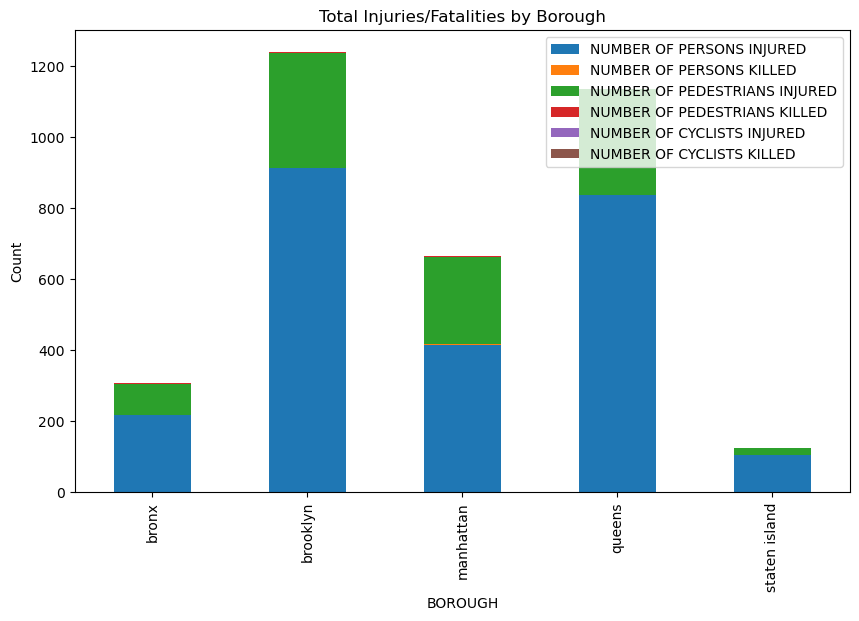

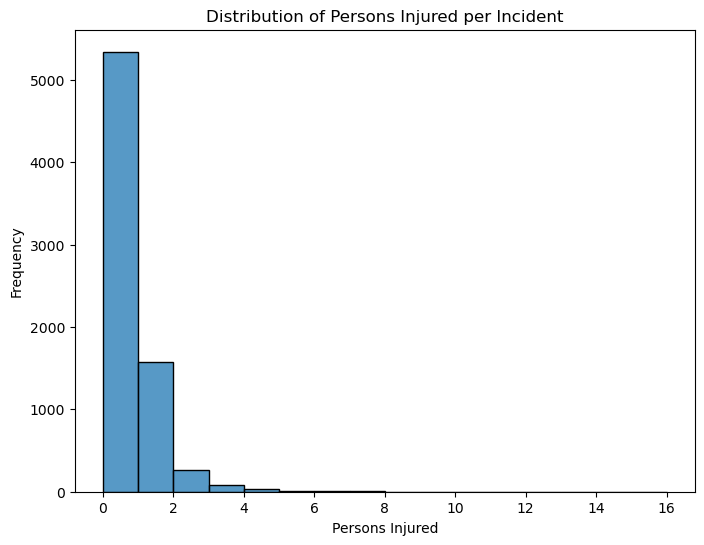

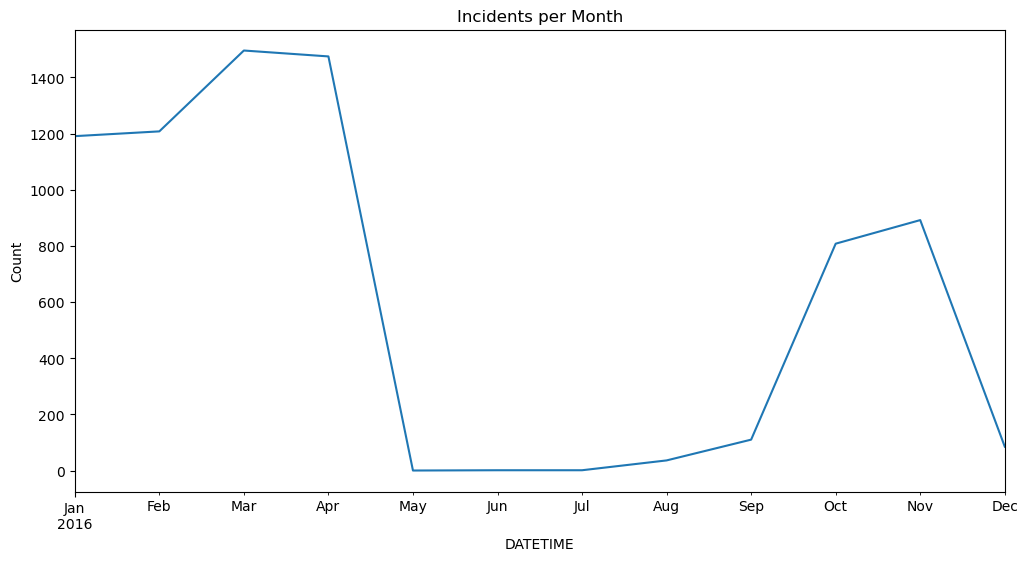

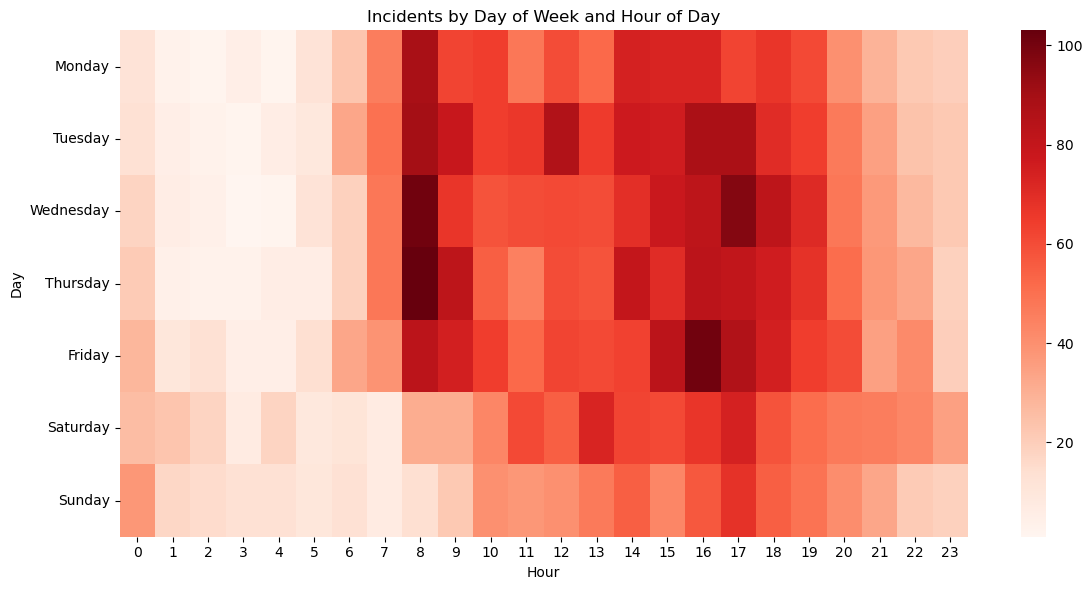

In [16]:
import seaborn as sns
import plotly.figure_factory as ff

# Injury/fatality numeric columns for convenience
injury_cols = [
    "NUMBER OF PERSONS INJURED",
    "NUMBER OF PERSONS KILLED",
    "NUMBER OF PEDESTRIANS INJURED",
    "NUMBER OF PEDESTRIANS KILLED",
    "NUMBER OF CYCLISTS INJURED",
    "NUMBER OF CYCLISTS KILLED",
]

# Hexmap
fig = ff.create_hexbin_mapbox(
    data_frame=df,
    lat="LATITUDE",
    lon="LONGITUDE",
    nx_hexagon=80,
    color="NUMBER OF PERSONS INJURED",
    agg_func=np.sum,
    opacity=0.85,
    labels={"color": "NUMBER OF PERSONS INJURED"},
)

fig.update_layout(
    mapbox_style="open-street-map",
    margin=dict(b=0, t=0, l=0, r=0),
)
fig.show()

# Stacked bar per borough
severity_per_borough = df.groupby("BOROUGH")[injury_cols].sum().fillna(0)
severity_per_borough.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Total Injuries/Fatalities by Borough")
plt.ylabel("Count")
plt.show()


# Histogram of total persons injured
plt.figure(figsize=(8,6))
sns.histplot(df["NUMBER OF PERSONS INJURED"], bins=range(0, df["NUMBER OF PERSONS INJURED"].max()+1), kde=False)
plt.title("Distribution of Persons Injured per Incident")
plt.xlabel("Persons Injured")
plt.ylabel("Frequency")
plt.show()

# Time series of incidents per month
monthly_counts = (
    df.dropna(subset=["DATETIME"])
      .groupby(pd.Grouper(key="DATETIME", freq="ME"))
      .size()
)

ax = monthly_counts.plot(figsize=(12, 6))
ax.set_title("Incidents per Month")
ax.set_ylabel("Count")

# Heatmap: day of week × hour of day

tmp = df.dropna(subset=["DATETIME"])
pivot = (
    tmp.groupby([tmp["DATETIME"].dt.day_name(), tmp["DATETIME"].dt.hour])
       .size()
       .unstack(fill_value=0)
)

# reorder rows to Monday..Sunday
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
pivot = pivot.reindex(days)

import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="Reds")
plt.title("Incidents by Day of Week and Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Day")
plt.tight_layout()

In [17]:
# Re-validate against schema to ensure structure and types remain correct
schema.validate(df, inplace=False)

BOROUGH  ZIP CODE   LATITUDE  LONGITUDE      ON STREET NAME  \
0      brooklyn     11208  40.662514 -73.872007      wortman avenue   
1     manhattan     10013  40.721323 -74.008344       hubert street   
2      brooklyn     11201  40.687999 -73.997563        henry street   
3        queens     11375  40.719228 -73.854542                <NA>   
4      brooklyn     11210  40.632147 -73.952731      bedford avenue   
...         ...       ...        ...        ...                 ...   
7298   brooklyn     11235  40.584305 -73.959113      east 11 street   
7299   brooklyn     11220  40.638583 -74.020772            4 avenue   
7300   brooklyn     11235  40.581744 -73.953836     shore boulevard   
7301  manhattan     10016  40.750960 -73.982723      west 38 street   
7302   brooklyn     11213  40.663604 -73.934391  schenectady avenue   

     CROSS STREET NAME     OFF STREET NAME  NUMBER OF PERSONS INJURED  \
0       montauk avenue                <NA>                          0   
1        hudson street                <NA>                          1   
2        warren street                <NA>                          0   
3                 <NA>  67-64 fleet street                          0   
4          campus road                <NA>                          0   
...                ...                 ...                        ...   
7298       blake court                <NA>                          0   
7299         64 street                <NA>                          0   
7300        cass place                <NA>                          0   
7301          5 avenue                <NA>                          0   
7302  empire boulevard                <NA>                          0   

      NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS INJURED  ...  \
0                            0                              0  ...   
1                            0                              1  ...   
2                            0                              0  ...   
3                            0                              0  ...   
4                            0                              0  ...   
...                        ...                            ...  ...   
7298                         0                              0  ...   
7299                         0                              0  ...   
7300                         0                              0  ...   
7301                         0                              0  ...   
7302                         0                              0  ...   

      CONTRIBUTING FACTOR VEHICLE 2  CONTRIBUTING FACTOR VEHICLE 3  \
0                       unspecified                           <NA>   
1                              <NA>                           <NA>   
2                lost consciousness                           <NA>   
3     failure to yield right-of-way  failure to yield right-of-way   
4     failure to yield right-of-way                           <NA>   
...                             ...                            ...   
7298                    unspecified                           <NA>   
7299                    unspecified                           <NA>   
7300                    unspecified                           <NA>   
7301             lost consciousness                           <NA>   
7302                    unspecified                           <NA>   

      CONTRIBUTING FACTOR VEHICLE 4 CONTRIBUTING FACTOR VEHICLE 5  \
0                              <NA>                          <NA>   
1                              <NA>                          <NA>   
2                              <NA>                          <NA>   
3                              <NA>                          <NA>   
4                              <NA>                          <NA>   
...                             ...                           ...   
7298                           <NA>                          <NA>   
7299                           <NA>         